# Analyzing the Dynamisc of tfSF

In this notebook we take a look into the dynamics of tfSF, reproducing the experiments run on npSF in [1].

## Setup

We start by importing some libraries:

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm

import tfSF
import npSF

We define the parameters of our simulation:

In [5]:
n_simulations = 1

original_features = 2
learned_features = 2
n_samples = 5
n_epochs = 200

maxX = 5
minX = -5   

We also define some graphical parameters for plotting

In [20]:
from IPython.display import display, clear_output

colors = ['r','g','b','c','y']
markers = ['*', 'o', '^', 's', 'D']
z = range(n_samples)
dotsize = 25
refreshFrequency = 0.05

## Running the simulation

We generate some sample data

In [7]:
X = (minX-maxX) * np.random.rand(n_samples,original_features) + maxX

We instantiate and we train a tfSF module

In [8]:
tfsf = tfSF.SFilter(n_features=learned_features)
tfsf.fit(X,epochs=n_epochs)

Epoch 1/200
1/1 [==============================] - 0s 5ms/step - loss: 7.0608
Epoch 2/200
1/1 [==============================] - 0s 2ms/step - loss: 6.5122
Epoch 3/200
1/1 [==============================] - 0s 2ms/step - loss: 6.6770
Epoch 4/200
1/1 [==============================] - 0s 2ms/step - loss: 6.5890
Epoch 5/200
1/1 [==============================] - 0s 2ms/step - loss: 6.4094
Epoch 6/200
1/1 [==============================] - 0s 2ms/step - loss: 6.1142
Epoch 7/200
1/1 [==============================] - 0s 2ms/step - loss: 6.1796
Epoch 8/200
1/1 [==============================] - 0s 3ms/step - loss: 6.2345
Epoch 9/200
1/1 [==============================] - 0s 2ms/step - loss: 6.3556
Epoch 10/200
1/1 [==============================] - 0s 2ms/step - loss: 6.3656
Epoch 11/200
1/1 [==============================] - 0s 2ms/step - loss: 6.2987
Epoch 12/200
1/1 [==============================] - 0s 5ms/step - loss: 6.2550
Epoch 13/200
1/1 [==============================] - 0s 5ms/st

## Dynamics of the learned representations

We now want observe how the learned representations change during the learning process.

To do this, we extract the weights we learned at each iteration.

In [9]:
tfWs = tfsf.weights

We then define a helper function to compute the tfSF learned representation as a function of the weights. Notice that here, for simplicity, we call the steps of SF implemented using *numpy*; since no learning is now required, using *numpy* saves us the overhead of instantiating a *tensorflow* model.

In [10]:
def computeZ(X,W):
    WX = np.dot(W,X.T)
    F = npSF.softabsolute(WX)
    Fsquish, _ = npSF.l2row(F)
    Fhat, _ = npSF.l2row(Fsquish.T)
    Z = Fhat.T
    return Z

Finally we plot the learned representations epoch by epoch.

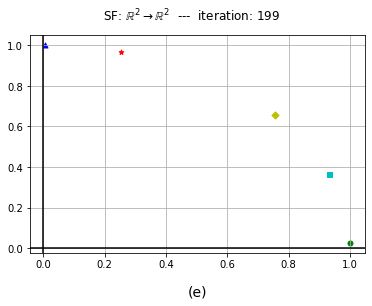

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 

for i in range(n_epochs):
    
    fig.suptitle(r"SF: $\mathbb{R}^{2}\rightarrow\mathbb{R}^{2}$  ---  iteration: "+ str(i))
    Z = computeZ(X,tfWs[i])
    
    for x,y,c,m in zip(Z[0],Z[1],colors,markers):
        ax.scatter(x,y,s=dotsize,c=c,marker=m)
    ax.axhline(0,color='black')
    ax.axvline(0,color='black')
    ax.grid(True)
    ax.text(0.5, -0.18,'(e)', horizontalalignment='center', verticalalignment='center',transform=ax.transAxes, fontsize=14)
        
    display(fig)
    
    clear_output(wait = True)
    plt.pause(refreshFrequency)
    ax.cla()

## Detailed dynamics

Further, we can have an insight on all the steps of the SF algorithm.

We select an epoch to be analyzed.

In [22]:
epoch = 22

Next we plot the internal representations at each step.

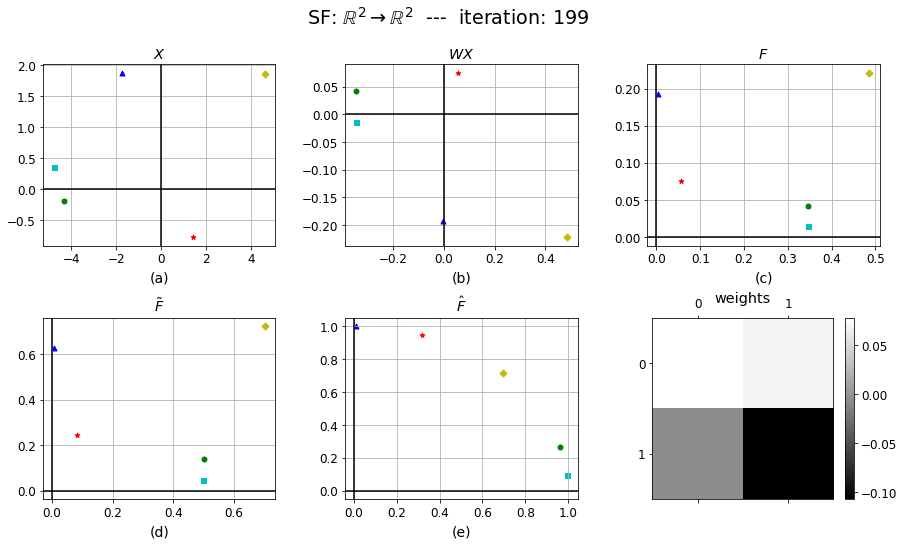

In [26]:
W = tfWs[epoch]

fig = plt.figure(figsize=(15,8))
        
plt.rc('font', size=16)
fig.suptitle(r"SF: $\mathbb{R}^{2}\rightarrow\mathbb{R}^{2}$  ---  iteration: "+ str(i))
plt.rc('font', size=12)
        
ax = fig.add_subplot(231,title=r"$X$")
for x,y,c,m in zip(X[:,0],X[:,1],colors,markers):
    ax.scatter(x,y,s=dotsize,c=c,marker=m)
ax.axhline(0,color='black')
ax.axvline(0,color='black')
ax.grid(True)
ax.text(0.5, -0.18,'(a)', horizontalalignment='center', verticalalignment='center',transform=ax.transAxes, fontsize=14)
        
WX = np.dot(W,X.T)
        
ax = fig.add_subplot(232,title=r"$WX$")
for x,y,c,m in zip(WX[0],WX[1],colors,markers):
    ax.scatter(x,y,s=dotsize,c=c,marker=m)
ax.axhline(0,color='black')
ax.axvline(0,color='black')
ax.grid(True)
ax.text(0.5, -0.18,'(b)', horizontalalignment='center', verticalalignment='center',transform=ax.transAxes, fontsize=14)
        
F = npSF.softabsolute(WX)
         
ax = fig.add_subplot(233, title="$F$")
for x,y,c,m in zip(F[0],F[1],colors,markers):
    ax.scatter(x,y,s=dotsize,c=c,marker=m)
ax.axhline(0,color='black')
ax.axvline(0,color='black')
ax.grid(True)
ax.text(0.5, -0.18,'(c)', horizontalalignment='center', verticalalignment='center',transform=ax.transAxes, fontsize=14)
        
Fsquish, _ = npSF.l2row(F)
        
ax = fig.add_subplot(234, title="$ \~F$")
for x,y,c,m in zip(Fsquish[0],Fsquish[1],colors,markers):
    ax.scatter(x,y,s=dotsize,c=c,marker=m)
ax.axhline(0,color='black')
ax.axvline(0,color='black')
ax.grid(True)
ax.text(0.5, -0.18,'(d)', horizontalalignment='center', verticalalignment='center',transform=ax.transAxes, fontsize=14)
        
Fhat, _ = npSF.l2row(Fsquish.T)
Fhat = Fhat.T
        
ax = fig.add_subplot(235, title="$\hat{F}$")
for x,y,c,m in zip(Fhat[0],Fhat[1],colors,markers):
    ax.scatter(x,y,s=dotsize,c=c,marker=m)
ax.axhline(0,color='black')
ax.axvline(0,color='black')
ax.grid(True)
ax.text(0.5, -0.18,'(e)', horizontalalignment='center', verticalalignment='center',transform=ax.transAxes, fontsize=14)
        
ax = fig.add_subplot(236, title="weights")
cax = ax.matshow(W, cmap=plt.get_cmap("gray"))
fig.colorbar(cax)
        
fig.subplots_adjust(hspace=0.4, wspace=0.3)  

## Conclusions

- Dynamics match the results in  [1]

### References
[1] Zennaro, F.M. and Chen, K., 2018. Towards understanding sparse filtering: A theoretical perspective. Neural Networks, 98, pp.154-177.